
Health Insurance Charges Prediction

This project employs two models(Linear Regression and Random Forest) to estimate health insurance charges incurred based on six individual attributes of the users.
Data Source : https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance  (1337 records, 7 columns)

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns


In [112]:
# loading data set
insurance=pd.read_csv('/Users/raghul/Downloads/insurance.csv')


Exploring the dataset

In [113]:
# exploring data set
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [116]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


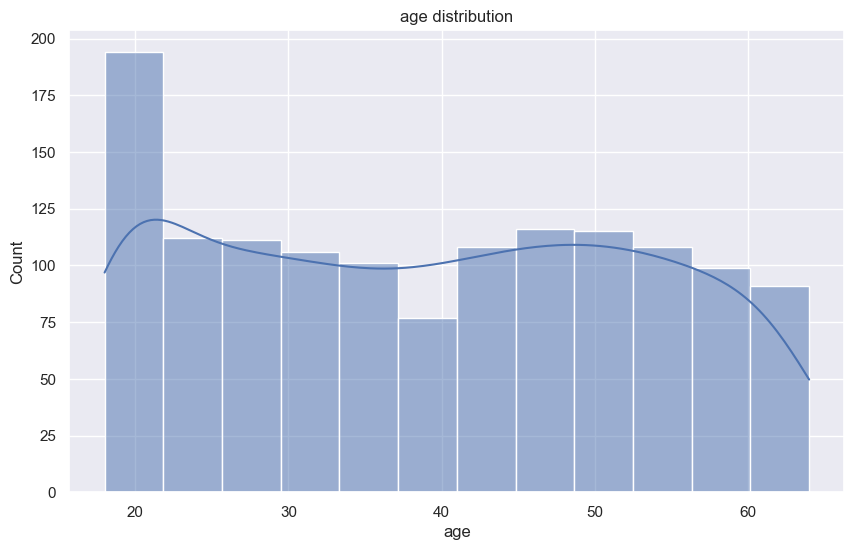

In [117]:
# age distribution plot
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(insurance['age'],kde=True)
plt.title('age distribution')
plt.show()


Text(0.5, 1.0, 'sex distribution')

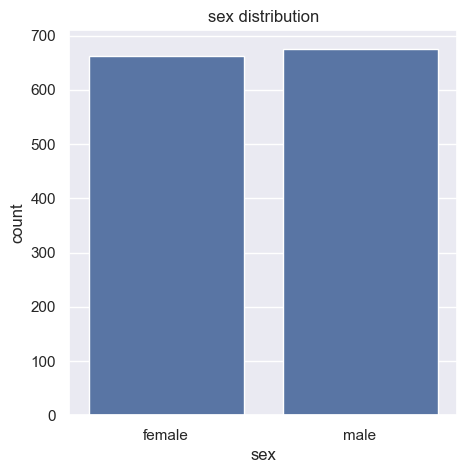

In [118]:
# Sex distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance)
plt.title('sex distribution')
          

In [119]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

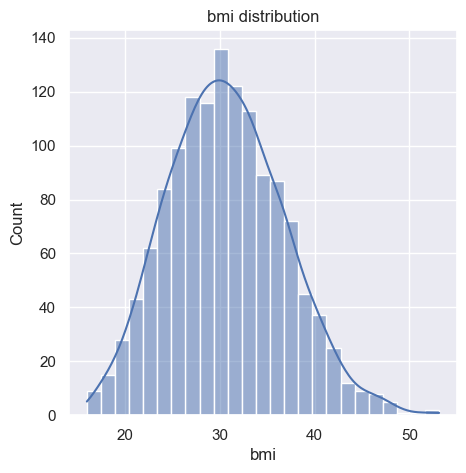

In [120]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.histplot(insurance['bmi'],kde=True)
plt.title('bmi distribution')
plt.show()

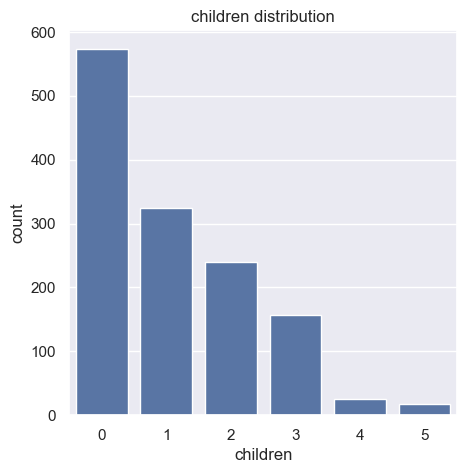

In [121]:
#children distribution
plt.figure(figsize=(5,5))
plt.title('children distribution')
sns.countplot(x='children',data=insurance)
plt.show()

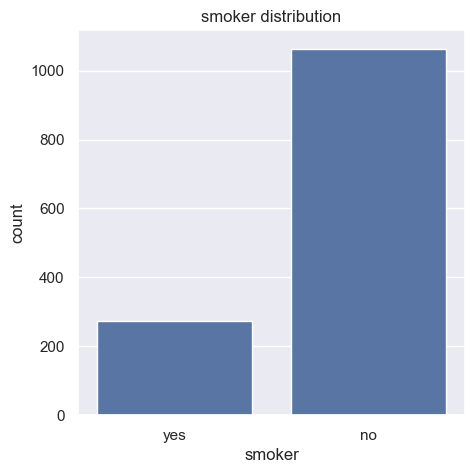

In [122]:
# smoker distribution
plt.figure(figsize=(5,5))
plt.title('smoker distribution')
sns.countplot(x='smoker',data=insurance)
plt.show()

In [123]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'region distribution')

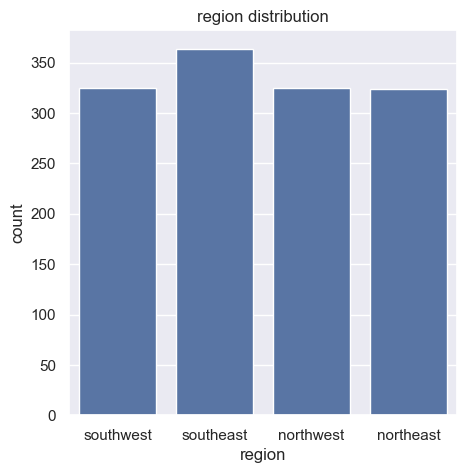

In [124]:
# region distribution
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance)
plt.title('region distribution')

In [125]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

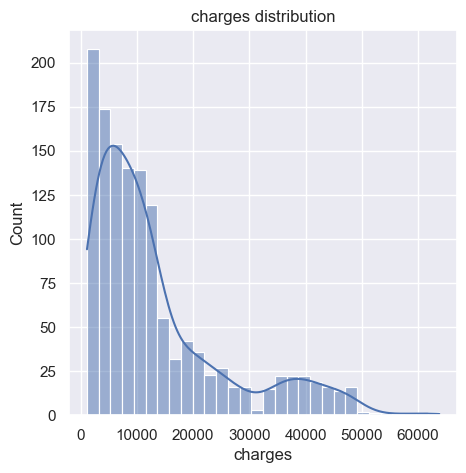

In [126]:
# charges distribution
plt.figure(figsize=(5,5))
plt.title('charges distribution')
sns.histplot(insurance['charges'],kde=True)
plt.show()

pre-processing the data

In [127]:
# encoding categorical variables

insurance_one_hot = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])



In [128]:
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [129]:
# splitting the feature and target
x = insurance_one_hot.drop(columns='charges',axis=1)
y = insurance_one_hot['charges']

In [130]:
x


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [131]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [132]:
# splitting the data into training and testing data

x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [133]:
print(x.shape, x_train.shape,x_test.shape)

(1338, 11) (1070, 11) (268, 11)


Training Model

Linear Regression

In [134]:
reg = LinearRegression()
reg.fit(x_train,Y_train)

LinearRegression()

In [135]:
training_data_prediction=reg.predict(x_train)

In [136]:
# lr score training
r2_train =metrics.r2_score(Y_train,training_data_prediction)
mse_train =metrics.mean_squared_error(Y_train,training_data_prediction)
print('lr train r2:',r2_train)
print('lr train MSE:',mse_train)

lr train r2: 0.7477680686451551
lr train MSE: 36787756.37046202


In [137]:
testing_data_prediction=reg.predict(x_test)

In [138]:
# lr score testing
r2_test =metrics.r2_score(Y_test,testing_data_prediction)
mse_test=metrics.mean_squared_error(Y_test,testing_data_prediction)
print('r2 score for testing data:',r2_test)
print('lr test MSE:',mse_test)

r2 score for testing data: 0.7623311844057112
lr test MSE: 35479352.80730364


Random Forest model

In [145]:
# Finding best parameters for Rf using gridsearch cv
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, Y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_s

In [146]:

best_rf = grid_search.best_estimator_


# Maing predictions
Rf_train_predictions = best_rf.predict(x_train)
Rf_test_predictions = best_rf.predict(x_test)

# scoring
train_r2 = metrics.r2_score(Y_train, Rf_train_predictions)
test_r2 = metrics.r2_score(Y_test, Rf_test_predictions)
train_mse=metrics.mean_absolute_error(Y_train, Rf_train_predictions)
test_mse=metrics.mean_absolute_error(Y_test, Rf_test_predictions)




print('Rf Training R2:', train_r2)
print('Rf Test R2:', test_r2)
print('Rf Training MSE:', train_mse)
print('Rf Test MSE:', test_mse)

Rf Training R2: 0.9102546129770818
Rf Test R2: 0.8754729558286259
Rf Training MSE: 1986.75515580681
Rf Test MSE: 2366.5908961946407


R2 and MSE score of RandomForest model is better compared to linear regression model.

Results (comparison)

In [149]:
# Comparing predicted vs actual test charges data

df=insurance
out = pd.DataFrame({'charge_actual': Y_test, 'lr_charge_pred': testing_data_prediction, 'rf_charge_pred':Rf_test_predictions})



result = df.merge(out, left_index=True, right_index=True)


result[['age', 'sex', 'bmi', 'smoker', 'children', 'region', 'charge_actual', 'lr_charge_pred','rf_charge_pred']].sample(20)

,age,sex,bmi,smoker,children,region,charge_actual,lr_charge_pred,rf_charge_pred
997,63,female,36.850,no,0,southeast,13887.96850,15737.666402,14265.700841
292,25,male,45.540,yes,2,southeast,42112.23560,33108.386296,39958.489346
383,35,female,43.340,no,2,southeast,5846.91760,11431.387619,6742.866423
801,64,female,35.970,no,0,southeast,14313.84630,15712.129383,14577.806395
939,53,male,29.480,no,0,southeast,9487.64420,10550.257520,13980.174450
1277,32,female,29.735,no,0,northwest,4357.04365,6109.408304,4610.305241
404,31,male,20.400,no,0,southwest,3260.19900,2100.488178,4598.703170
1048,25,female,22.515,no,1,northwest,3594.17085,2392.927531,5272.565955
382,55,male,33.000,no,0,southeast,20781.48892,12197.347076,11406.585806
1183,48,female,27.360,no,1,northeast,9447.38240,10269.557839,13413.457413
